# Example 25.3

Using Analytic Gradient for Backpropagation

$$
Z_{n,m} = f_1( X_{n,d}.W_{1\;d,m}) \\
O_{n,p} = f_2(Z_{n,m}.W_{2\;m,p}) \\ 
$$

$$
\mathcal{E} = \frac{1}{n}\sum^{n}_{i=1}\frac{1}{2} \left( \mathbf Y_{i} - \mathbf O_{i}\right)^2 
$$

$$
\mathcal{E} = \frac{1}{n}\sum^{n}_{i=1}\sum^{p}_{j=1}\left( -Y_{i,j}\log O_{i,j}\right)
$$

$$
\left(\frac{\partial\mathcal{E}}{\partial net_2}\right)_{n,p}=\left(\frac{\partial\mathcal E}{\partial f_2}\right)_{n,p}\odot\left(\frac{\partial f_2}{\partial net_2}\right)_{n,p}
$$

$$
\left(\frac{\partial \mathcal{E}}{\partial net_1}\right)_{n,m}=\left(\left(\frac{\partial\mathcal{E}}{\partial net_2}\right)_{n,p}\cdot
\left(W_2^T\right)_{p,m}\right)\odot\left(\frac{\partial f_1}{\partial net_1}\right)_{n,m}
$$


$$
\left(\nabla_{W_2}\mathcal{E}\right)_{m,p} = \left(Z^T\right)_{m,n} \cdot \left(\frac{\partial\mathcal{E}}{\partial net_2}\right)_{n,p}
$$

$$
\left(\nabla_{W_1}\mathcal{E}\right)_{d,m} = \left(X^T\right)_{d,n} \cdot \left(\frac{\partial\mathcal{E}}{\partial net_1}\right)_{n,m}
$$

$$
\left(\frac{\partial\mathcal{E}}{\partial net_2}\right)_{n,p}=\frac{1}{n}( O - Y )_{n,p}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def f1(x): return np.tanh(x)
def df1(x): return 1 - np.power(np.tanh(x),2)
def f2(x): return x
def df2(x): return 1

def aug(X):                                 #puts a 1 column in front of matrix
    n = len(X)
    X1 = np.ones((n,1))
    return np.hstack((X1,X))

def predict(X,W1,W2):                       #the name suggests =)
    Z = f1( aug(X) @ W1)
    O = f2( aug(Z) @ W2)
    return O

def update_pars(Y,X,W1,W2):
    Xt = aug(X)
    Z = f1(Xt @ W1)
    Zt = aug(Z)
    dZ = df1(Xt @ W1)
    O = f2(Zt @ W2)
    G2 = (O - Y)/len(Y)
    dW2 = Zt.T @ G2
    W2 -= eta * dW2
    G1 = (G2 @ W2[1:].T)*dZ
    dW1 = Xt.T @ G1
    W1 -= eta * dW1


  0%|          | 0/100000 [00:00<?, ?it/s]

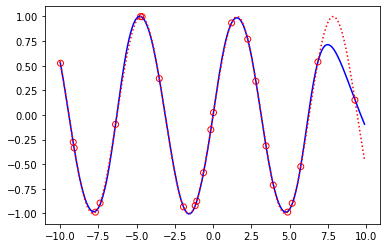

In [2]:
n,d,m,p = 25,1,10,1

X = np.random.uniform(-10,10,n).reshape((n,d))
Y = np.sin(X) # n,d

np.random.seed(11)
W1 = np.random.randn(d+1,m)
W2 = np.random.randn(m+1,p)

eta = 1e-1  # step size (learning rate)
num_steps = int(1e5)

for i in tqdm(range(num_steps)):
    # idx = np.random.choice(np.arange(n),5)
    # update_pars(Y[idx],X[idx],W1,W2)
    update_pars(Y,X,W1,W2)

t = np.arange(-10,10,0.1)
yt = np.sin(t)
yp = predict(t[:,None],W1,W2)

plt.plot(t,yp,'b')
plt.plot(t,yt,':r')
plt.scatter(X,Y,ec='red',fc='none')
plt.show()


-------------------------------------
# Example 25.3

Using Numerical Gradient for Backpropagation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def f1(x): return np.tanh(x)
def df1(x): return 1 - np.power(np.tanh(x),2)
def f2(x): return x
def df2(x): return 1

def aug(X):
    n = len(X)
    X1 = np.ones((n,1))
    return np.hstack((X1,X))

def predict(X,W1,W2):
    Z = f1( aug(X) @ W1)
    O = f2( aug(Z) @ W2)
    return O

def loss(Y,X,W1,W2):
    return np.average(np.power(predict(X,W1,W2)-Y,2))

def update(x,i,j):
    h=1e-5
    x0 = x[i,j].copy()
    x[i,j] = x0 + h
    f2 = loss(Y,X,W1,W2)
    x[i,j] = x0 - h
    f1 = loss(Y,X,W1,W2)
    g = (f2-f1)/(2*h)
    x0 = x0 - eta*g
    x[i,j] = x0


In [4]:
n,d,m,p = 25,1,10,1

X = np.random.uniform(-np.pi,np.pi,n).reshape((n,d))
Y = np.sin(X) # n,d

np.random.seed(111)
W1 = np.random.randn(d+1,m)
W2 = np.random.randn(m+1,p)

num_steps = int(1e4)
eta = 1e-2

print(f"loss = {loss(Y,X,W1,W2).round(3)}")


loss = 7.871


In [5]:
prevW1 = W1.round(1)
prevW1

array([[-1.1,  0.4,  1.5, -0.4, -0.8, -0.5, -0.1, -0.4, -0.7, -1.2],
       [ 0.2, -0.6, -1.4,  0.8, -1. , -0.1,  0.5,  0.4,  1.3,  0.3]])

In [6]:
prevW2 = W2.round(1)
prevW2

array([[-0.4],
       [-0.1],
       [-1. ],
       [-0.1],
       [ 0.6],
       [ 0.9],
       [-1.7],
       [ 0.5],
       [-0.3],
       [ 2.4],
       [ 1.6]])

training loss = 7.871
testing loss = 19.904


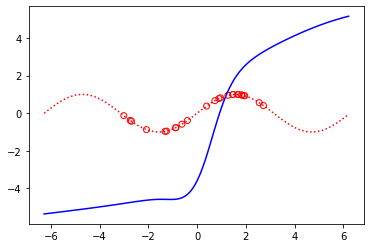

In [7]:

t = np.arange(-2*np.pi,2*np.pi,0.1)
yt = np.sin(t)
yp = predict(t[:,None],W1,W2)

print(f"training loss = {loss(Y,X,W1,W2).round(3)}")
print(f"testing loss = {loss(yt[:,None],t[:,None],W1,W2).round(3)}")

plt.plot(t,yp,'b')
plt.plot(t,yt,':r')
plt.scatter(X,Y,ec='red',fc='none')
plt.show()


  0%|          | 0/10000 [00:00<?, ?it/s]

training loss = 0.001
testing loss = 0.165


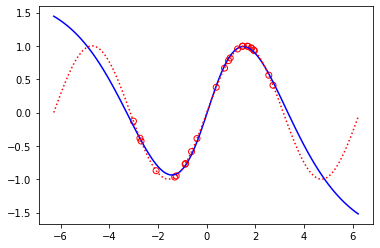

In [8]:
for i in tqdm(range(num_steps)):

    a,b = W1.shape
    for i in range(a):
        for j in range(b):
            update(W1,i,j)
    a,b = W2.shape
    for i in range(a):
        for j in range(b):
            update(W2,i,j)


t = np.arange(-2*np.pi,2*np.pi,0.1)
yt = np.sin(t)
yp = predict(t[:,None],W1,W2)

print(f"training loss = {loss(Y,X,W1,W2).round(3)}")
print(f"testing loss = {loss(yt[:,None],t[:,None],W1,W2).round(3)}")

plt.plot(t,yp,'b')
plt.plot(t,yt,':r')
plt.scatter(X,Y,ec='red',fc='none')
plt.show()


In [9]:
prevW1

array([[-1.1,  0.4,  1.5, -0.4, -0.8, -0.5, -0.1, -0.4, -0.7, -1.2],
       [ 0.2, -0.6, -1.4,  0.8, -1. , -0.1,  0.5,  0.4,  1.3,  0.3]])

In [10]:
W1.round(1)

array([[-1.1,  0.3,  1.3, -0.3, -0.6, -0.7,  0. , -0.4,  0. , -1.2],
       [ 0.4, -0.6, -1.6,  0.7, -0.3,  0.3,  0.6,  0.3,  0.6, -0.4]])

In [11]:
prevW2

array([[-0.4],
       [-0.1],
       [-1. ],
       [-0.1],
       [ 0.6],
       [ 0.9],
       [-1.7],
       [ 0.5],
       [-0.3],
       [ 2.4],
       [ 1.6]])

In [12]:
W2.round(1)

array([[-0.1],
       [-0.4],
       [-0.7],
       [ 0. ],
       [ 0.3],
       [ 0.9],
       [-2. ],
       [ 0.3],
       [-0.6],
       [ 2.1],
       [ 1.3]])

-------------------------------------
# Example 25.3

Using Numerical Gradient for Backpropagation (using y=x instead of tanh(x))

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def f1(x): return x
def df1(x): return 1
def f2(x): return x
def df2(x): return 1

def aug(X):
    n = len(X)
    X1 = np.ones((n,1))
    return np.hstack((X1,X))

def predict(X,W1,W2):
    Z = f1( aug(X) @ W1)
    O = f2( aug(Z) @ W2)
    return O

def loss(Y,X,W1,W2):
    return np.average(np.power(predict(X,W1,W2)-Y,2))

def update(x,i,j):
    h=1e-5
    x0 = x[i,j].copy()
    x[i,j] = x0 + h
    f2 = loss(Y,X,W1,W2)
    x[i,j] = x0 - h
    f1 = loss(Y,X,W1,W2)
    g = (f2-f1)/(2*h)
    x0 = x0 - eta*g
    x[i,j] = x0


In [14]:
n,d,m,p = 25,1,10,1

X = np.random.uniform(-np.pi,np.pi,n).reshape((n,d))
Y = np.sin(X) # n,d

np.random.seed(111)
W1 = np.random.randn(d+1,m)
W2 = np.random.randn(m+1,p)

num_steps = int(1e4)
eta = 1e-2

print(f"loss = {loss(Y,X,W1,W2).round(3)}")


loss = 101.913


  0%|          | 0/10000 [00:00<?, ?it/s]

training loss = 0.189
testing loss = 1.48


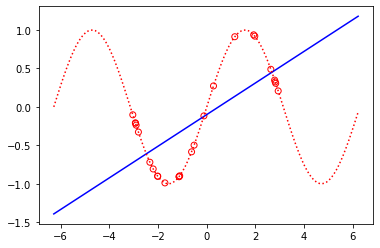

In [15]:
for i in tqdm(range(num_steps)):

    a,b = W1.shape
    for i in range(a):
        for j in range(b):
            update(W1,i,j)
    a,b = W2.shape
    for i in range(a):
        for j in range(b):
            update(W2,i,j)


t = np.arange(-2*np.pi,2*np.pi,0.1)
yt = np.sin(t)
yp = predict(t[:,None],W1,W2)

print(f"training loss = {loss(Y,X,W1,W2).round(3)}")
print(f"testing loss = {loss(yt[:,None],t[:,None],W1,W2).round(3)}")

plt.plot(t,yp,'b')
plt.plot(t,yt,':r')
plt.scatter(X,Y,ec='red',fc='none')
plt.show()


----------------------
# Nonlinear Regression

$$
\begin{array}{rl}
y_i & = & f(x_i) + e_i \\
f(x_i)_{j+1} & = & f(x_i)_{j} + \frac{\partial f(x_i)_j}{\partial a_0}\Delta a_0 + \frac{\partial f(x_i)_j}{\partial a_1}\Delta a_1 + e_i \\
y_i - f(x_i)_{j} & = & \frac{\partial f(x_i)_j}{\partial a_0}\Delta a_0 + \frac{\partial f(x_i)_j}{\partial a_1}\Delta a_1 + e_i \\
\end{array}
$$

$$
\left[y - f(x)\right]_{i,j} = \left[\frac{\partial f(x)}{\partial a_0} \; \frac{\partial f(x)}{\partial a_1}\right]_{i,j}\left[\begin{matrix}\Delta a_0 \\ \Delta a_1\end{matrix}\right]+[e]_i \rightarrow \{D\} = [Z]\{\Delta A\}+\{E\}\\
\{\Delta A\} = \left[Z^T\,Z\right]^{-1}\{[Z]^T\{D\}\} \\
\{A_{j+1}\} = \{A_{j}\} + \{\Delta A_j\} 
$$

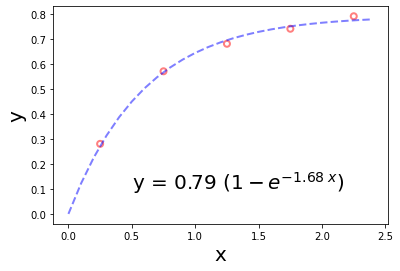

In [16]:
from numpy.core.fromnumeric import size
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time



def f(x):
    return a0*(1-np.exp(-a1*x))

def df0(x):
    return (1-np.exp(-a1*x))

def df1(x):
    return a0*x*np.exp(-a1*x)

x = np.array([0.25,0.75,1.25,1.75,2.25])[:,None]
y = np.array([0.28,0.57,0.68,0.74,0.79])[:,None]


X = np.arange(0,2.5,0.1)

eps = 0.0001
a0,a1 =1.,1.
for i in range(1000):
    D = y-f(x)
    Z = np.hstack([df0(x),df1(x)])
    dA = np.linalg.inv( Z.T @ Z ) @ (Z.T @ D)
    a0_ = a0 + dA[0]
    a1_ = a1 + dA[1]
    if (np.abs(a0-a0_) < eps) & (np.abs(a0-a0_) < eps ): 
        break
    a0,a1 = a0_,a1_
    Y = f(X)

    plt.gca().cla() 
    plt.scatter(x,y,fc='none',ec='red',lw=2,alpha=0.5)
    plt.xlabel("x",size=20)
    plt.ylabel("y",size=20)
    plt.plot(X,Y,'--b',lw=2,alpha=0.5)
    plt.text(0.5,0.1,f'y = {a0[0].round(2)} $(1-e^{{-{a1[0].round(2)}\;x}})$',size=20)
    time.sleep(2)
    display.clear_output(wait=True)
    display.display(plt.gcf()) 


display.clear_output(wait=True)